# Analysis of the results from dynamical cavity runs
This notebook load and combine the output files produced by the script `power.py`  to produce the figure shown in the paper.

Output from ```dynamics.py``` are saved in pickle files with name `"gamma_G:"+str(gamma_G)+"gamma_TF:"+str(gamma_TF)+specifier+".pkl"`.
Multiple outputs at the same theta are saved with different unique identifiers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from matplotlib.colors import LogNorm
import os
import re
import itertools
from collections import Counter,OrderedDict,defaultdict

import sys
sys.path.insert(0, "../lib")  # add the library folder to the path I look for modules
import latexify

def new_color(ax):
    return next(ax._get_lines.prop_cycler)['color']

In [2]:
pattern = re.compile("gamma_G_\d*\.\d+|\dgamma_TF_\d*\.\d+|\d")
filenames=os.listdir("./")
topology_names=[name  for name in filenames if pattern.match(name)]# select only dictionary files
topology_names

['gamma_G_3.0gamma_TF_4.0',
 'gamma_G_1.81gamma_TF_1.81',
 'gamma_G_3.0gamma_TF_3.5']

In [3]:
gamma_G = 1.81

gamma_TF = 1.81
theta = 0
def load_obj(gamma_G,gamma_TF,theta,specifier=''):
    folder = 'gamma_G_'+str(gamma_G)+'gamma_TF_'+str(gamma_TF)
    name='theta_'+str(theta)+specifier+'.pkl'
    with open(folder+'/data/dic-' + name , 'rb') as f:
        return pickle.load(f)
folder = 'gamma_G_'+str(gamma_G)+'gamma_TF_'+str(gamma_TF)
filenames=os.listdir(folder+"/data")

pattern = re.compile("dic-theta_"+"+|\d.pkl")

dictnames=[name  for name in filenames if pattern.match(name)]# select only dictionary files
print(' Results are available in the files:')
for filename in dictnames:
    print(filename)

 Results are available in the files:
dic-theta_0.pkl


In [6]:
def load_and_hist(gamma_G,gamma_TF,theta,specifier):
    dic = load_obj(gamma_G,gamma_TF,theta,specifier)
    Ts = dic['Ts']
    data = dic['data']
    img = []
    for i in range(len(Ts)):
        h,b = np.histogram(data[i],bins = np.linspace(0,1,200),density=True)
        img+=[h]
    return img,b,Ts
theta = 0
dic = load_obj(gamma_G,gamma_TF,theta)
R = dic['R']
M = dic['M']
avg_degree = len(R.data) / R.shape[0]
img1,b,Ts1 = load_and_hist(gamma_G,gamma_TF,theta,'')
'''
#Lines commented allow to merge different simulations into one
img2,b2,Ts2 = load_and_hist(gamma_G,gamma_TF,theta,'_1613837422.3679252')
#img2,b2,Ts2 = load_and_hist(gamma_G,gamma_TF,theta,'_1614636800.1580975')
#img3,b3,Ts3 = load_and_hist(theta,'_1606851526.9612727')
cond = Ts1>max(Ts2)
img = np.concatenate((img2,np.array(img1)[cond,:]))
Ts = np.append(Ts2,Ts1[cond])

cond = (Ts>max(Ts3))|(Ts<min(Ts3))
img = np.concatenate((img3,np.array(img)[cond,:]))
Ts = np.append(Ts3,Ts[cond])

Ts,img = zip(*sorted(zip(Ts,img)))

plt.hlines(len(Ts1)/(max(Ts1)-min(Ts1)),min(Ts1),max(Ts1),color  = 'blue',label = '1')
plt.hlines(len(Ts2)/(max(Ts2)-min(Ts2)),min(Ts2),max(Ts2),color = 'r',label= '2')
#plt.hlines(len(Ts3)/(max(Ts3)-min(Ts3)),min(Ts3),max(Ts3),color = 'g',label= '3')
plt.xlabel('T')
plt.ylabel('Number of points/$\\Delta T$')
plt.title('Resolution of simulations in T')
plt.legend()

Ts = np.array(Ts)
'''
#b = b1
Ts = np.array(Ts1)
img = np.array(img1)
_



['gamma_G_3.0gamma_TF_4.0',
 'gamma_G_1.81gamma_TF_1.81',
 'gamma_G_3.0gamma_TF_3.5']

In [7]:

plt.ylabel('$\\Pi(P)$',fontsize = 13)dic['R']
folder

'gamma_G_1.81gamma_TF_1.81'

$$p_3 = \left \langle \frac{1}{2}\left[ 1-\tanh\frac{\beta J x}{2}\right]\right \rangle_x
$$
with $\langle x \rangle = p_+$

<ipython-input-11-82187ee3859b>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,np.array(img).T+0.01,norm = LogNorm(0.01,10),cmap ='inferno')


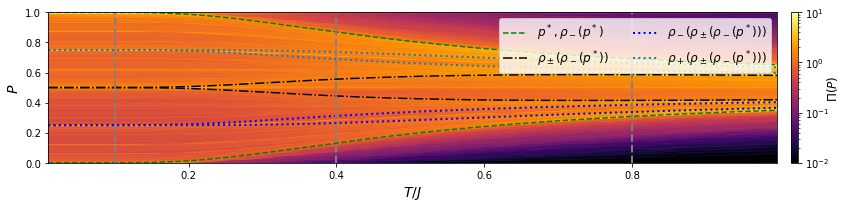

In [11]:
plt.figure(figsize = (13,3))
folder = 'gamma_G_'+str(gamma_G)+'gamma_TF_'+str(gamma_TF)
X,Y = np.meshgrid(Ts,b)
plt.pcolormesh(X,Y,np.array(img).T+0.01,norm = LogNorm(0.01,10),cmap ='inferno')
cbar = plt.colorbar(pad = 0.015)
cbar.set_label("$\\Pi(P)$",rotation=90,fontsize=12,labelpad=-5)

plt.ylabel('$P$',fontsize = 14)
plt.xlabel('$T/J$',fontsize = 14)
#x = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
#y = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
avg_degree = 1
x = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
y = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))

def plus(P):
    '''
    computes the average 0.5 <1+tanh[(Jx+theta)/2T]>_x with <x> = P'''
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
def minus(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))




plt.plot(Ts,x,'g--')
plt.plot(Ts,minus(x),'g--',label ='$p^*,\\rho_-(p^*)$')
plt.plot(Ts,minus(minus(x)),'k-.')
plt.plot(Ts,plus(minus(x)),'k-.',label ='$\\rho_\pm(\\rho_-(p^*))$')
plt.plot(Ts,minus(plus(minus(x))),':',lw = 2,color = 'blue',label = '$\\rho_-(\\rho_\pm(\\rho_-(p^*)))$')
plt.plot(Ts,minus(minus(minus(x))),':',lw = 2,color = 'blue')
ax = plt.gca()
c=new_color(ax)
plt.plot(Ts,plus(plus(minus(x))),':',lw = 2,color = c,label = '$\\rho_+(\\rho_\pm(\\rho_-(p^*)))$')
plt.plot(Ts,plus(minus(minus(x))),':',lw = 2,color = c)
plt.axvline(0.1,ls = '--',lw = 2,color = 'gray')
plt.axvline(0.4,ls = '--',lw = 2,color = 'gray')
plt.axvline(0.8,ls = '--',lw = 2,color = 'gray')
plt.legend(loc = 'upper right',fontsize = 12,ncol = 2)
plt.tight_layout()
#plt.savefig(folder+'/T_dependence_AND.pdf')


In [31]:
img.shape
dic['N1']

200000

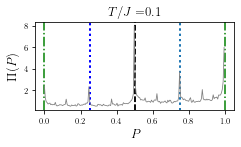

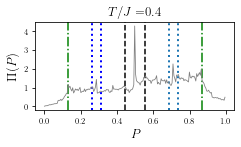

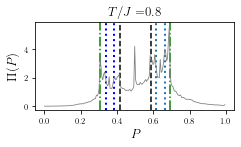

In [12]:
savefig =True
latexify.latexify(columns = 2)
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-0.1))])

#[plt.axvline(0.5**3*j,ymin=0.,ls = '--',c = 'm',alpha = 0.5) for j in range(9)]
ax = plt.gca()
plt.axvline(plus(minus(x))[i],color = 'k',ls = '--')
plt.axvline(minus(minus(x))[i],color = 'k',ls = '--')
plt.axvline(x[i],color = 'g',ls = '-.')
plt.axvline(minus(x)[i],color = 'g',ls = '-.')
plt.axvline(minus(plus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
plt.axvline(minus(minus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
c=new_color(ax)
plt.axvline(plus(plus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.axvline(plus(minus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)),linewidth = 0.8,color = 'gray')

#plt.semilogy()
plt.title('$T/J=$'+str(round(Ts[i],1)),fontsize = 13)
#plt.legend()
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
if savefig:
    plt.savefig(folder+'/T_'+str(round(Ts[i],1))+'.pdf')
plt.figure()
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-0.4))])
ax = plt.gca()
plt.axvline(plus(minus(x))[i],color = 'k',ls = '--')
plt.axvline(minus(minus(x))[i],color = 'k',ls = '--')
plt.axvline(x[i],color = 'g',ls = '-.')
plt.axvline(minus(x)[i],color = 'g',ls = '-.')
plt.axvline(minus(plus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
plt.axvline(minus(minus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
c=new_color(ax)
plt.axvline(plus(plus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.axvline(plus(minus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)),linewidth = 0.8,color = 'gray')

#plt.legend()
plt.title('$T/J=$'+str(round(Ts[i],1)),fontsize = 13)
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
if savefig:
    plt.savefig(folder+'/T_'+str(round(Ts[i],1))+'.pdf')

plt.figure()
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-0.8))])
plt.axvline(plus(minus(x))[i],color = 'k',ls = '--')
plt.axvline(minus(minus(x))[i],color = 'k',ls = '--')
plt.axvline(x[i],color = 'g',ls = '-.')
plt.axvline(miT/Jnus(x)[i],color = 'g',ls = '-.')
plt.axvline(minus(plus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
plt.axvline(minus(minus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
ax = plt.gca()
c=new_color(ax)
plt.axvline(plus(plus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.axvline(plus(minus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)),linewidth = 0.8,color = 'gray')
#plt.legend()
plt.title('$T/J=$'+str(round(Ts[i],1)),fontsize = 13)
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
if savefig:
    plt.savefig(folder+'/T_'+str(round(Ts[i],1))+'.pdf')



In [11]:
folder

'gamma_G_3.0gamma_TF_3.5'

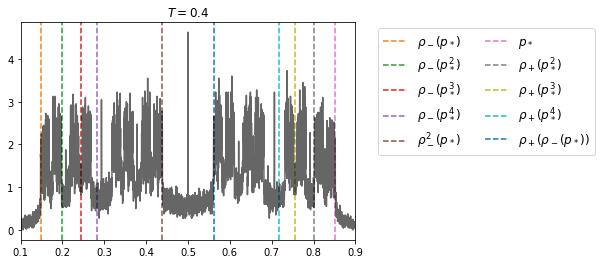

In [7]:

i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-0.4))])
ax = plt.gca()
hist_color = next(ax._get_lines.prop_cycler)['color']
plt.axvline(minus(x)[i],c = new_color(ax),ls = '--',label = '$\\rho_-(p_*)$') 
plt.axvline(minus(x**2)[i],c=new_color(ax),ls = '--',label = '$\\rho_-(p^2_*)$')
plt.axvline(minus(x**3)[i],c = new_color(ax),ls = '--',label = '$\\rho_-(p^3_*)$')
plt.axvline(minus(x**4)[i],c = new_color(ax),ls = '--',label = '$\\rho_-(p^4_*)$')
plt.axvline(minus(minus(x))[i],c = new_color(ax),ls = '--',label = '$\\rho_-^2(p_*)$') 


plt.axvline(x[i],c=new_color(ax),ls = '--',label = '$p_*$')
plt.axvline(plus(x**2)[i],c=new_color(ax),ls = '--',label = '$\\rho_+(p^2_*)$')
plt.axvline(plus(x**3)[i],c = new_color(ax),ls = '--',label = '$\\rho_+(p^3_*)$')
plt.axvline(plus(x**4)[i],c = new_color(ax),ls = '--',label = '$\\rho_+(p^4_*)$')
plt.axvline(plus(minus(x))[i],c = new_color(ax),ls = '--',label = '$\\rho_+(\\rho_-(p_*))$')

plt.plot(b[:-1],img[i],c = 'k',alpha = 0.6)
plt.title( '$T=$'+str(round(Ts[i],1)))
plt.xlim(0.1,0.9)

plt.legend(ncol = 2,bbox_to_anchor=(1.05, 1),loc='upper left',numpoints = 1,fontsize = 12)

$$
\rho_-(P) =  1/2(1-P\tanh(\beta J/2)
$$

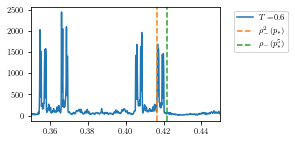

In [223]:
ax = plt.gca()
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-0.6))])
h,b = np.histogram(dic['data'][i],bins = np.linspace(0,1,5000))
plt.plot(b[:-1],h,label = '$T=$'+str(round(Ts[i],1)))
plt.xlim(0.35,0.45)
#plt.axvline(minus(x)[i],c = new_color(ax),ls = '--',label = '$\\rho_-(p_*)$') 
plt.axvline(minus(minus(x))[i],c = new_color(ax),ls = '--',label = '$\\rho_-^2(p_*)$') 
plt.axvline(minus(x**5)[i],c = new_color(ax),ls = '--',label = '$\\rho_-(p^5_*)$')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

OrderedDict([(1, 175030),
             (2, 17585),
             (3, 4197),
             (4, 1518),
             (5, 707),
             (6, 376),
             (7, 196),
             (8, 119),
             (9, 67),
             (10, 47),
             (11, 35),
             (12, 26),
             (13, 28),
             (14, 14),
             (15, 7),
             (16, 5),
             (17, 9),
             (18, 4),
             (19, 3),
             (20, 2),
             (21, 2),
             (22, 2),
             (23, 4),
             (24, 3),
             (25, 2),
             (26, 1),
             (27, 1),
             (28, 5),
             (29, 2),
             (50, 2),
             (56, 1)])

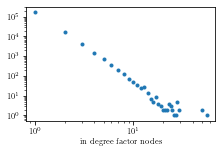

In [118]:

M_transpose = M.transpose().tolil()
js = M_transpose.rows  # list of list, structure is [el[i]] where el[i]
Ks = np.array([len(neigh) for neigh in js])  # in degree of each gene
plt.plot(list(Counter(Ks).keys()),list(Counter(Ks).values()),'.')
plt.loglog()
plt.xlabel('in degree factor nodes')
OrderedDict(sorted(Counter(Ks).items()))


## $\theta \neq 0$

In [271]:
theta = 0.2
dic = load_obj(gamma_G,gamma_TF,theta)
R = dic['R']
M = dic['M']
avg_degree = len(R.data) / R.shape[0]
img1,b,Ts1 = load_and_hist(gamma_G,gamma_TF,theta,'')
img2,b2,Ts2 = load_and_hist(gamma_G,gamma_TF,theta,'_1614636800.1580975')

#img3,b3,Ts3 = load_and_hist(theta,'_1606851526.9612727')
cond = Ts2>max(Ts1)
img = np.concatenate((img1,np.array(img2)[cond,:]))
Ts = np.append(Ts1,Ts2[cond])


!pwd

/Users/giuseppe/Documents/GitHub/dynamics/AND_logic/power_law/T-dependence


In [244]:
!ls gamma_G\:3.0gamma_TF\:4.0/data

dic-theta_0.2.pkl                    dic-theta_0.pkl
dic-theta_0.2_1614636800.1580975.pkl dic-theta_0_1613837422.3679252.pkl


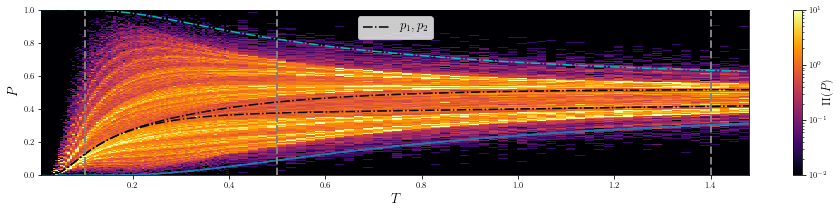

In [247]:
plt.figure(figsize = (13,3))
X,Y = np.meshgrid(Ts,b)
plt.pcolormesh(X,Y,np.array(img).T+0.01,norm = LogNorm(0.01,10),cmap ='inferno')
cbar = plt.colorbar(cmap ='inferno')
#plt.xlim(0,3)
plt.ylabel('$P$',fontsize = 14)
plt.xlabel('$T$',fontsize = 14)
def plus(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
def minus(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))

x = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))



#plt.plot(Ts,minus*plus + plus/2,'--k')
#plt.plot(Ts,minus**2+plus/2,'k--',label = '$p_1$,$p_2$')
plt.plot(Ts,plus(1),color = 'c',ls  = '-.')
plt.plot(Ts,minus(1),color = 'c',ls  = '-.')


plt.plot(Ts,minus(1))
plt.plot(Ts,plus(minus(1)),'k-.')
plt.plot(Ts,minus(minus(1)),color = 'k',ls = '-.',label = '$p_1,p_2$')


#plt.plot(Ts,0.5-0.5*np.tanh((1+theta)/np.sqrt(avg_degree)/2/Ts*a),'g:')
#plt.plot(Ts,0.5+0.5*np.tanh((1+theta)/np.sqrt(avg_degree)/2/Ts*(a)),'g:',label = '$1/2\\left\\lbrace 1\pm tanh\\left[\\beta J/2(1/2(1-tanh(\\beta J/2)))\\right])\\right\\rbrace$')
plt.axvline(0.1,ls = '--',lw = 2,color = 'gray')
plt.axvline(0.5,ls = '--',lw = 2,color = 'gray')
plt.axvline(1.4,ls = '--',lw = 2,color = 'gray')
plt.legend(loc = 'upper center',fontsize = 13)
plt.tight_layout()
cbar.set_label("$\\Pi(P)$",rotation=90,fontsize=12,labelpad=-5)
#plt.savefig('T_dependence_AND_theta.pdf')



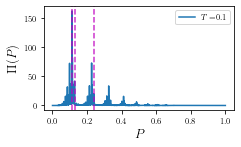

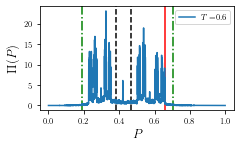

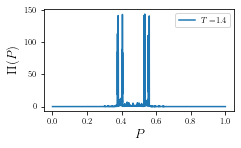

In [272]:
latexify.latexify(columns = 2)
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-0.1))])

plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)))
#[plt.axvline(0.5**3*j,ymin=0.,ls = '--',c = 'm',alpha = 0.5) for j in range(9)]
#[plt.axvline(0.5+0.5**j,ymin=0.5,ls = '--',c = 'm') for j in range(1,5)]
p0 = 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/0.1))
plt.axvline(p0,ls = '--',color = 'm',alpha = 0.8)
plt.axvline(p0*(1-p0),ls = '--',color = 'm',alpha = 0.8)
plt.axvline(p0*(2-p0),ls = '--',color = 'm',alpha = 0.8)
#plt.semilogy()
plt.legend()
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
#plt.savefig('T_'+str(round(Ts[i],1))+'.pdf')
plt.figure()
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-0.6))])

plt.axvline(plus(minus(1))[i],color = 'k',ls = '--')
plt.axvline(minus(minus(1))[i],color = 'k',ls = '--')
plt.axvline(plus(plus(1))[i],color = 'g',ls = '-.')
plt.axvline(minus(plus(1))[i],color = 'g',ls = '-.')
plt.axvline(x[i],c='r')

plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)))

#plt.axvline(0.5-0.5*np.tanh((1+theta)/np.sqrt(avg_degree)/2/Ts[i]),color = 'g',ls = ':')
#plt.axvline(0.5+0.5*np.tanh((1+theta)/np.sqrt(avg_degree)/2/Ts[i]),color = 'g',ls = ':')#,label = '$\\frac{1}{2}\\left(1\pm tanh\\left(\\beta J/2\\right)\\right)$')
plt.legend()
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
#plt.savefig('T_'+str(round(Ts[i],1))+'.pdf')
plt.figure()
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts-1.4))])

plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)))
plt.legend()
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
#plt.savefig('T_'+str(Ts[i])+'.pdf')



degree dependent histogram

In [273]:
dic = load_obj(gamma_G,gamma_TF,theta)
R = dic['R']
M = dic['M']
avg_degree = len(R.data) / R.shape[0]
R_transpose = R.transpose().tolil()
js = R_transpose.rows  # list of list, structure is [el[i]] where el[i]

interaction = R_transpose.data  # list of list, structure is [el[i]]
Ks = np.array([len(neigh) for neigh in js])  # in degree of each gene
Ks.max()

Ts = dic['Ts']
i = int(np.arange(len(Ts))[np.argmin(np.abs(dic['Ts'] -0.1))])


a = defaultdict(list)
for k,P in zip(Ks,dic['data'][i]):
    a[k].append(P)

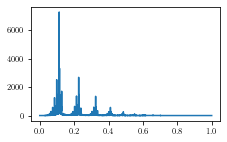

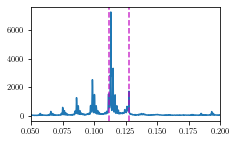

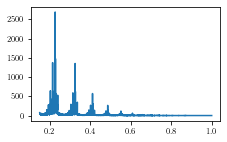

In [282]:

h,b = np.histogram(dic['data'][i],bins = np.linspace(0,1,5001))
plt.plot(b[:-1],h,label = '$T=$'+str(round(Ts[i],1)))

plt.figure()
plt.plot(b[:-1],h,label = '$T=$'+str(round(Ts[i],1)))
#[plt.axvline(0.5**3*j,ymin=0.,ls = '--',c = 'm',alpha = 0.5) for j in range(9)]
#[plt.axvline(0.5+0.5**j,ymin=0.5,ls = '--',c = 'm') for j in range(1,5)]
p0 = 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/0.1))
plt.axvline(p0,ls = '--',color = 'm',alpha = 0.8)
plt.axvline(p0*(1-p0),ls = '--',color = 'm',alpha = 0.8)
plt.axvline(p0*(2-p0),ls = '--',color = 'm',alpha = 0.8)
plt.xlim(0.05,0.2)
plt.figure()
cond = b[:-1]>0.15
plt.plot(b[:-1][cond],h[cond],label = '$T=$'+str(round(Ts[i],1)))


In [268]:
np.histogram?

In [ ]:
plt.figure()
cond = np.abs(dic['data'][i]-p0)<0.01


In [172]:
A = M.tolil()

array([list([33420]), list([27950, 36010, 68860, 122729]), list([109848]),
       ..., list([120965]), list([53412]), list([178665])], dtype=object)

[]

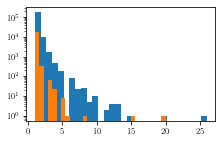

In [193]:

_ = plt.hist([len(A.rows[j]) for j in js],30)
_ = plt.hist([len(A.rows[j]) for j in js[cond]],30)
plt.semilogy()

In [234]:

N1,N2 = M.shape
R = R.tocsc()
M = M.tocsc()
mu_s = [R.indices[R.indptr[i]:R.indptr[i + 1]] for i in range(N1)]  # list of list, structure is [el[i]] where el[i]
# is the list of  predecessors of gene  i ( the index)
interaction = [R.data[R.indptr[i]:R.indptr[i + 1]] for i in range(N1)]  # list of list, structure is [el[i]]
# where el[i] is the list of  predecessors of gene i (interaction strength with sign)
Ks = np.diff(R.indptr)  # in degree of each gene
print(' the compuational cost is equivalent to evaluate a random reg. graph with degree = ',\
       np.mean((Ks+1) * (Ks + 2)) / 2)
interaction = [np.where(inter>0,1,-1) for inter in interaction]#make interactions as +=1 rather than floats
avg_degree = len(R.data) / N1
j_s = [M.indices[M.indptr[mu]:M.indptr[mu + 1]] for mu in range(N2)]  # list of list, structure is [el[mu]] where el[mu]

 the compuational cost is equivalent to evaluate a random reg. graph with degree =  3.287465


In [235]:
P_g = np.random.rand(N1)
P_t = [np.prod(P_g[j_s[mu]]) for mu in range(N2)]

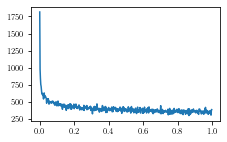

In [242]:
h,b  = np.histogram(P_t,500)
plt.plot(b[:-1],h)